In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\Asus\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

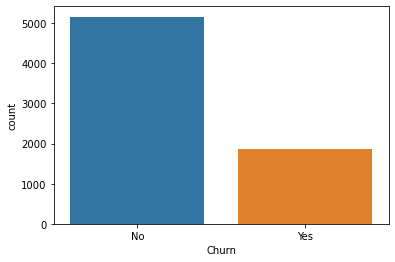

In [10]:
sns.countplot(x='Churn', data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

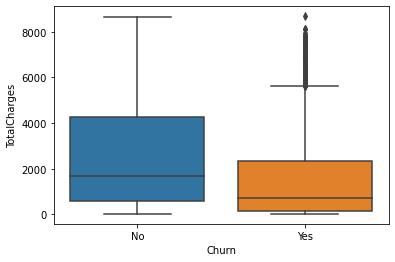

In [11]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

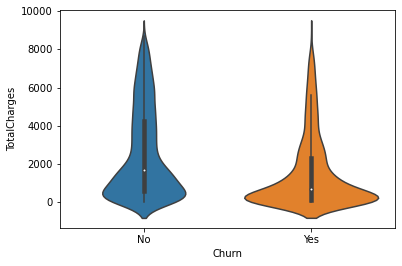

In [12]:
sns.violinplot(x='Churn', y='TotalCharges', data=df)

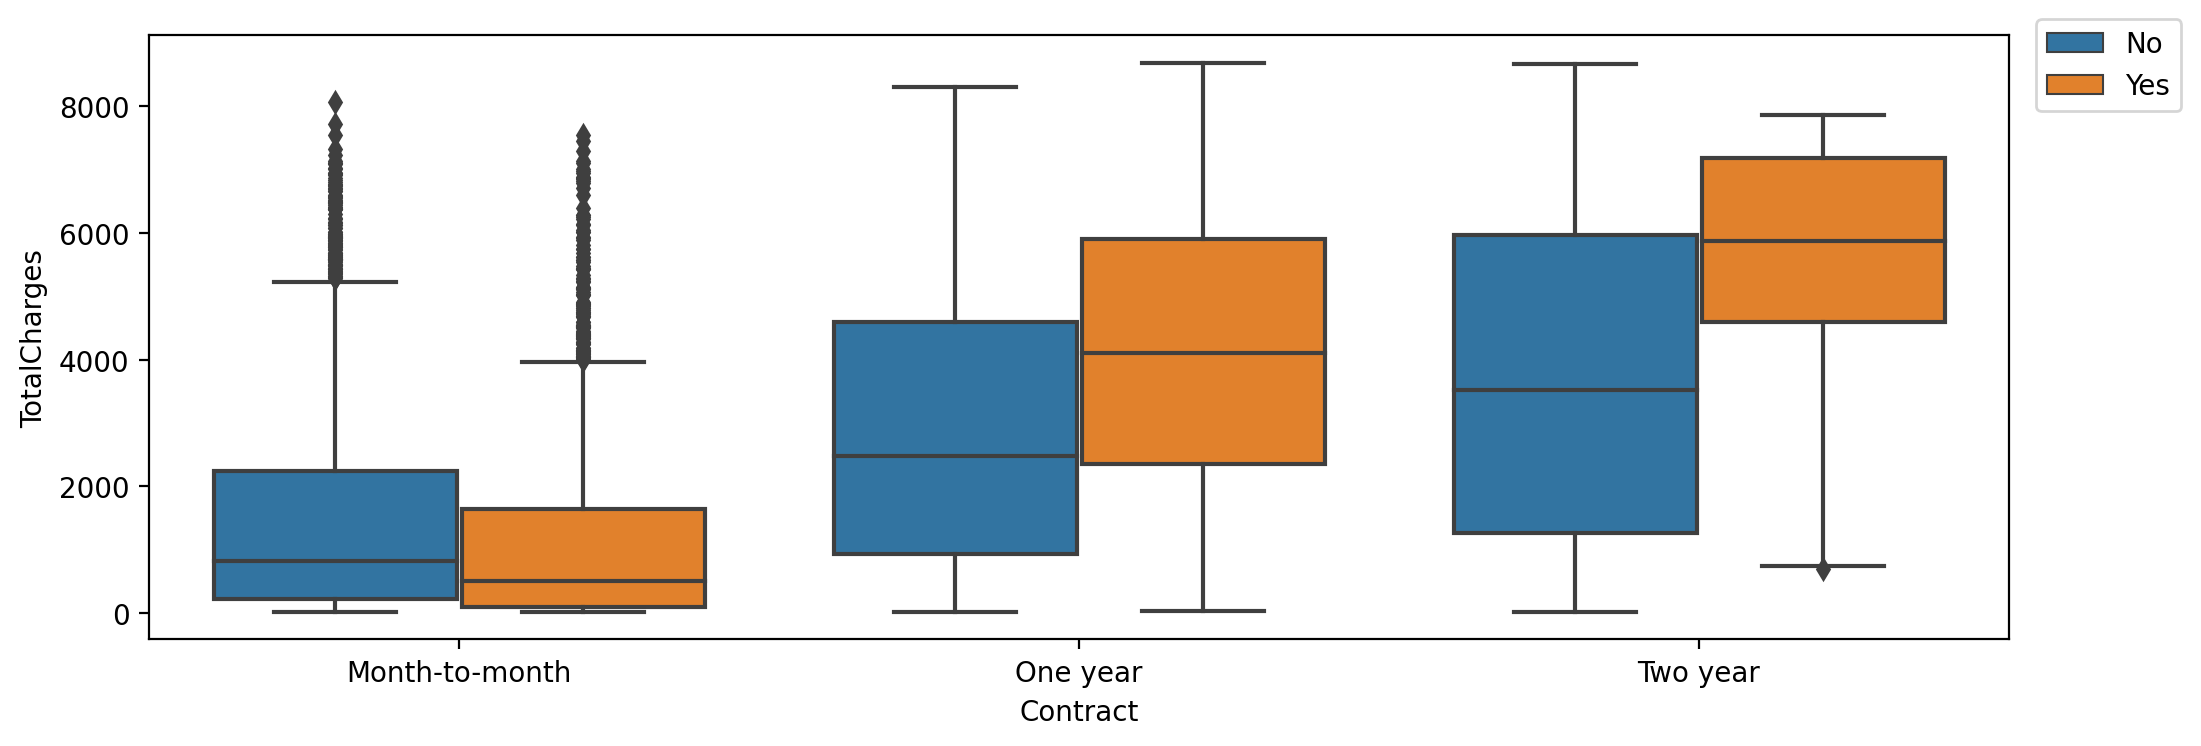

In [13]:
plt.figure(figsize=(12,4), dpi=200)
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=df)
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [14]:
df = df.drop(['customerID'], axis=1)

In [15]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [18]:
bar_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

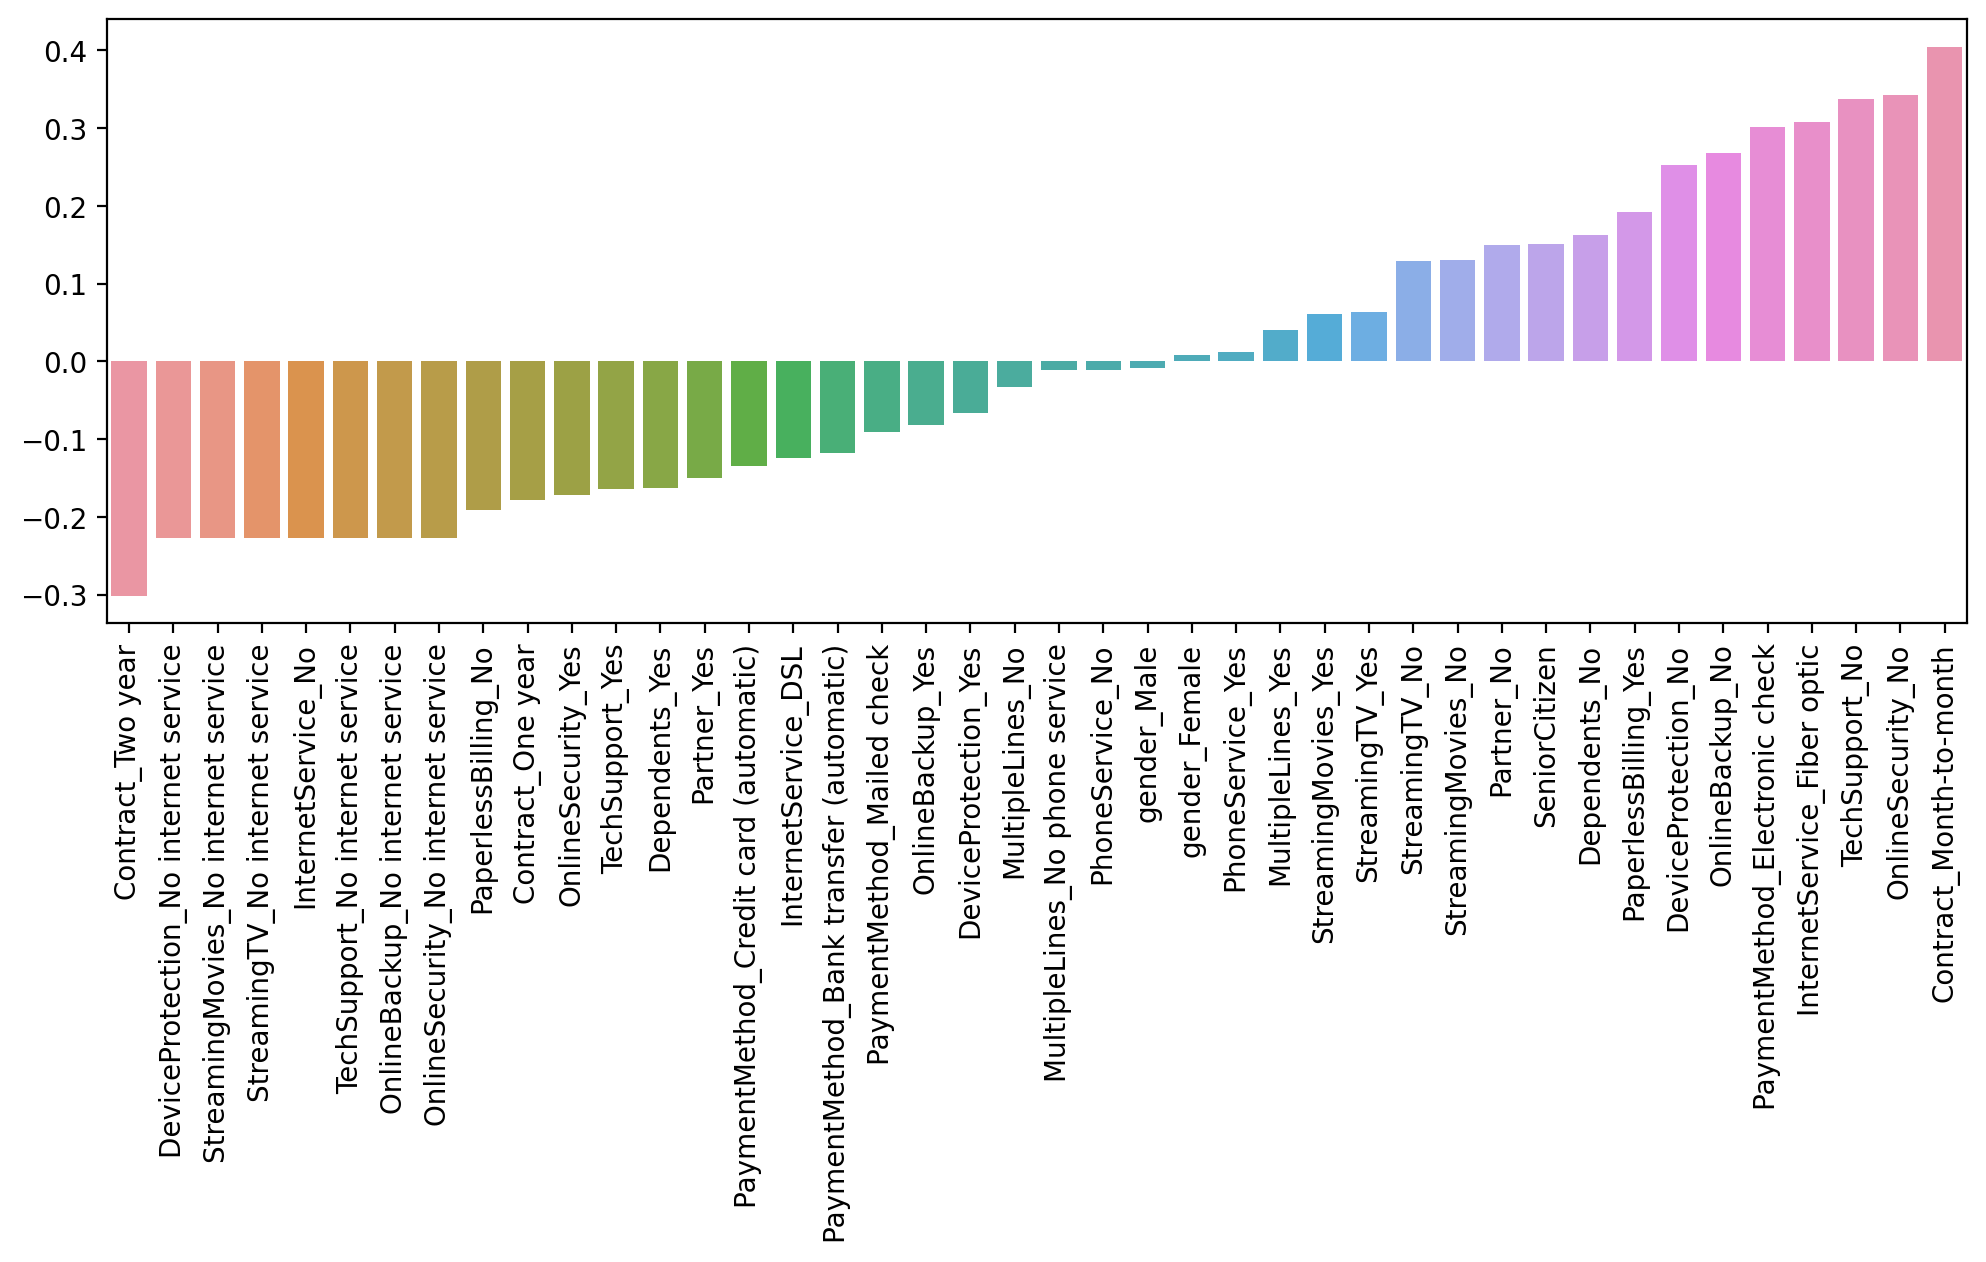

In [19]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x=bar_churn.index, y=bar_churn.values)
plt.xticks(rotation=90);

In [20]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

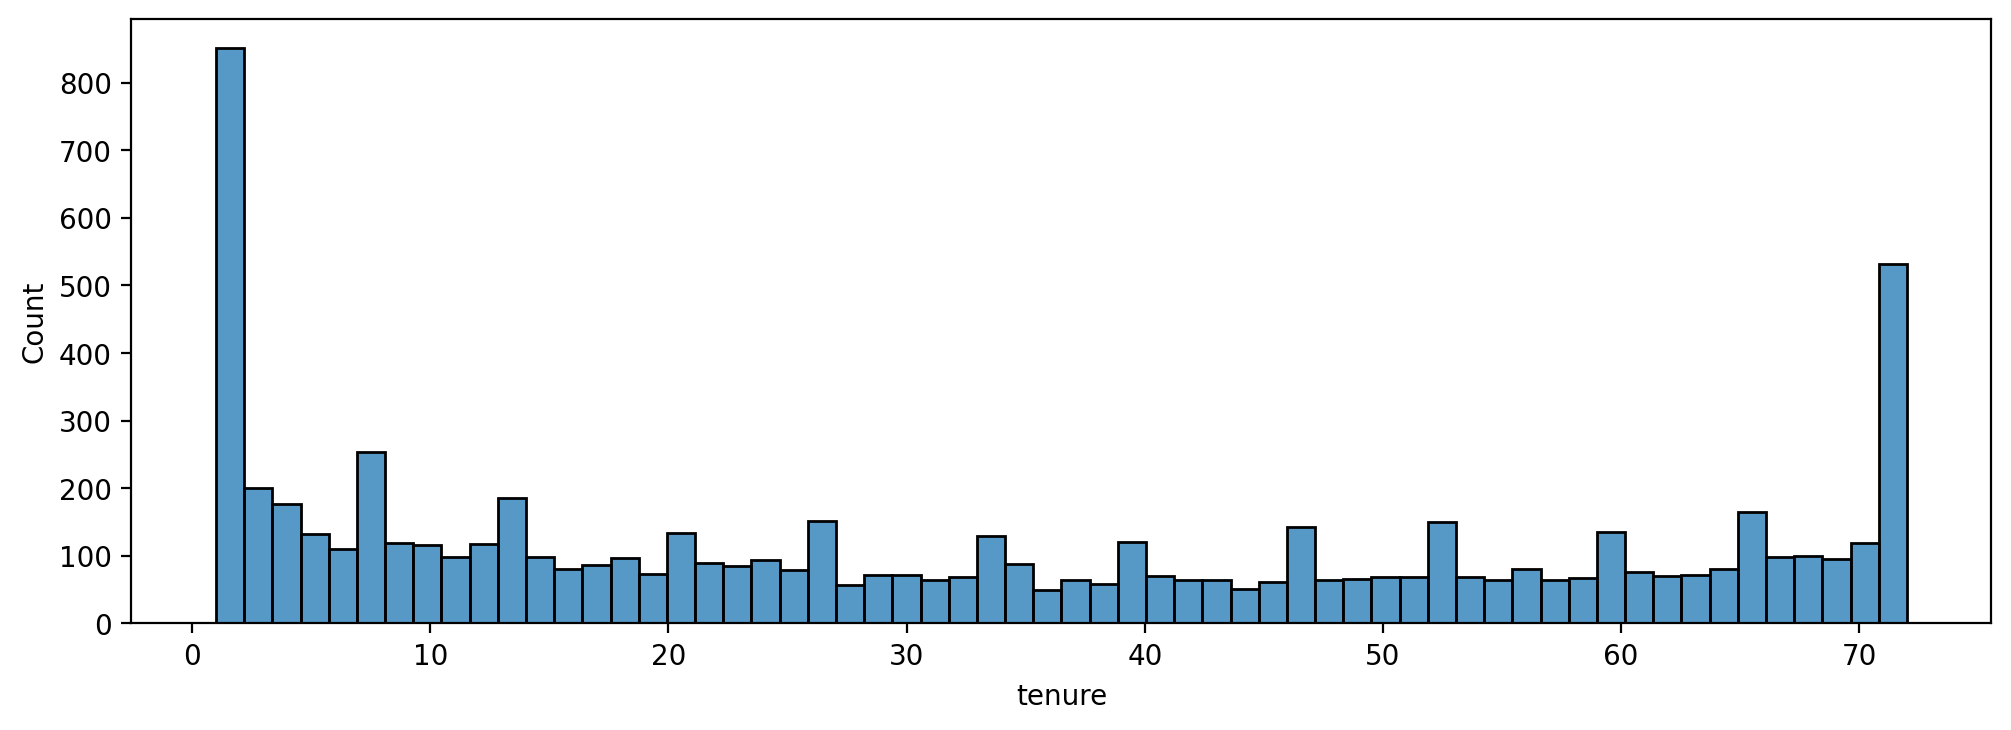

In [21]:
plt.figure(figsize=(12,4), dpi=200)
sns.histplot(df['tenure'], bins=60)

<Figure size 2400x800 with 0 Axes>

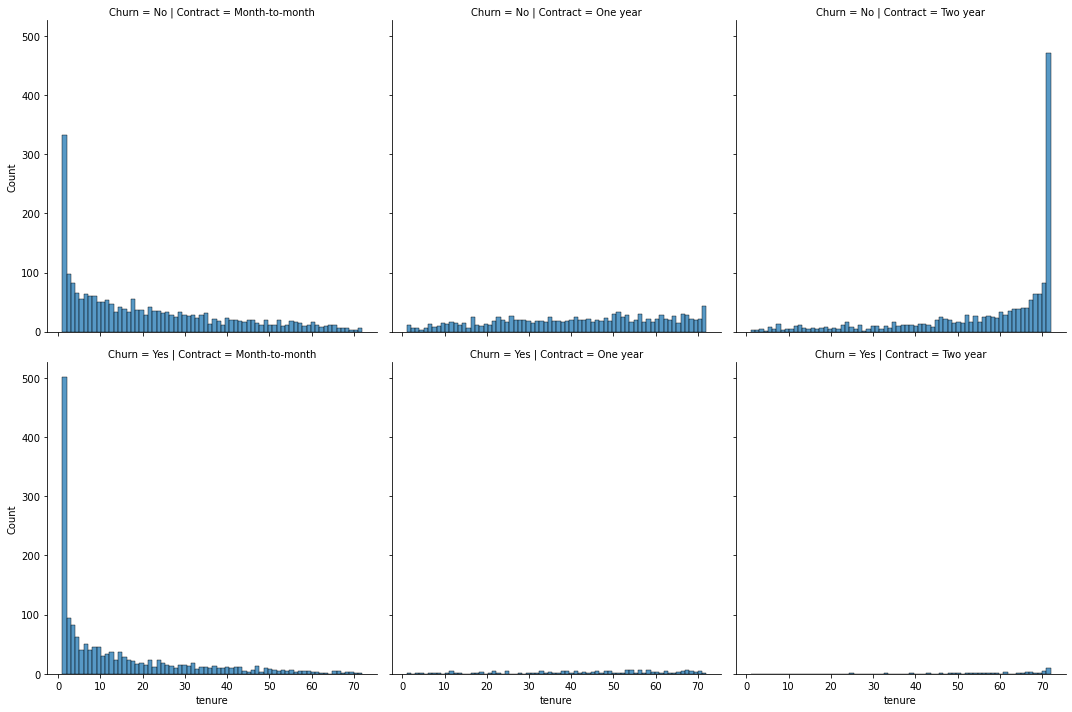

In [22]:
plt.figure(figsize=(12,4), dpi=200)
sns.displot(x=df['tenure'], bins=70, col=df['Contract'], row=df['Churn'] )

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

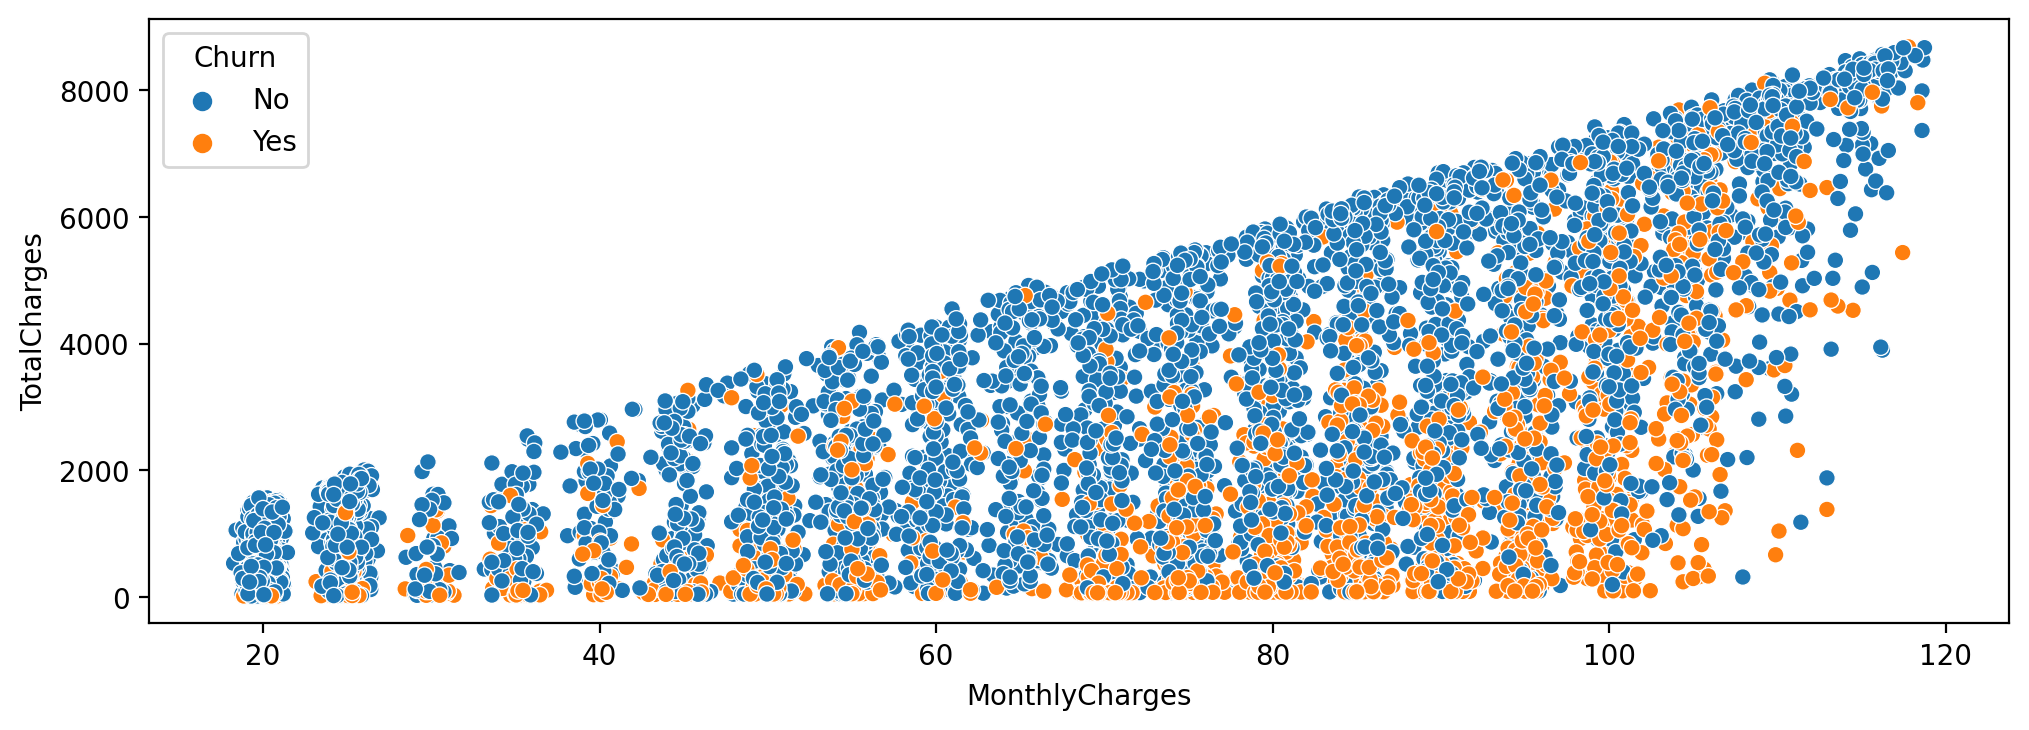

In [23]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges', data=df, hue='Churn')

In [24]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [25]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [26]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)

In [27]:
churn_rate.value_counts()

1          2          3     4          5          6          7          8          9          10         11         12         13         14         15         16    17         18         19         20         21         22    23         24         25         26         27         28         29         30         31         32         33      34         35         36    37         38         39    40       41    42         43         44         45        46         47         48       49         50         51         52    53    54         55       56    57         58        59         60        61         62        63        64   65         66         67         68   69        70        71        72      
61.990212  51.680672  47.0  47.159091  48.120301  36.363636  38.931298  34.146341  38.655462  38.793103  31.313131  32.478632  34.862385  31.578947  37.373737  35.0  29.885057  24.742268  26.027397  25.352113  26.984127  30.0  15.294118  24.468085  29.113924  18.987342  18.055556  21

In [28]:
#churn_rate.transpose()['customerID']
churn_rate.iloc[0]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

Text(0, 0.5, 'churn percentage')

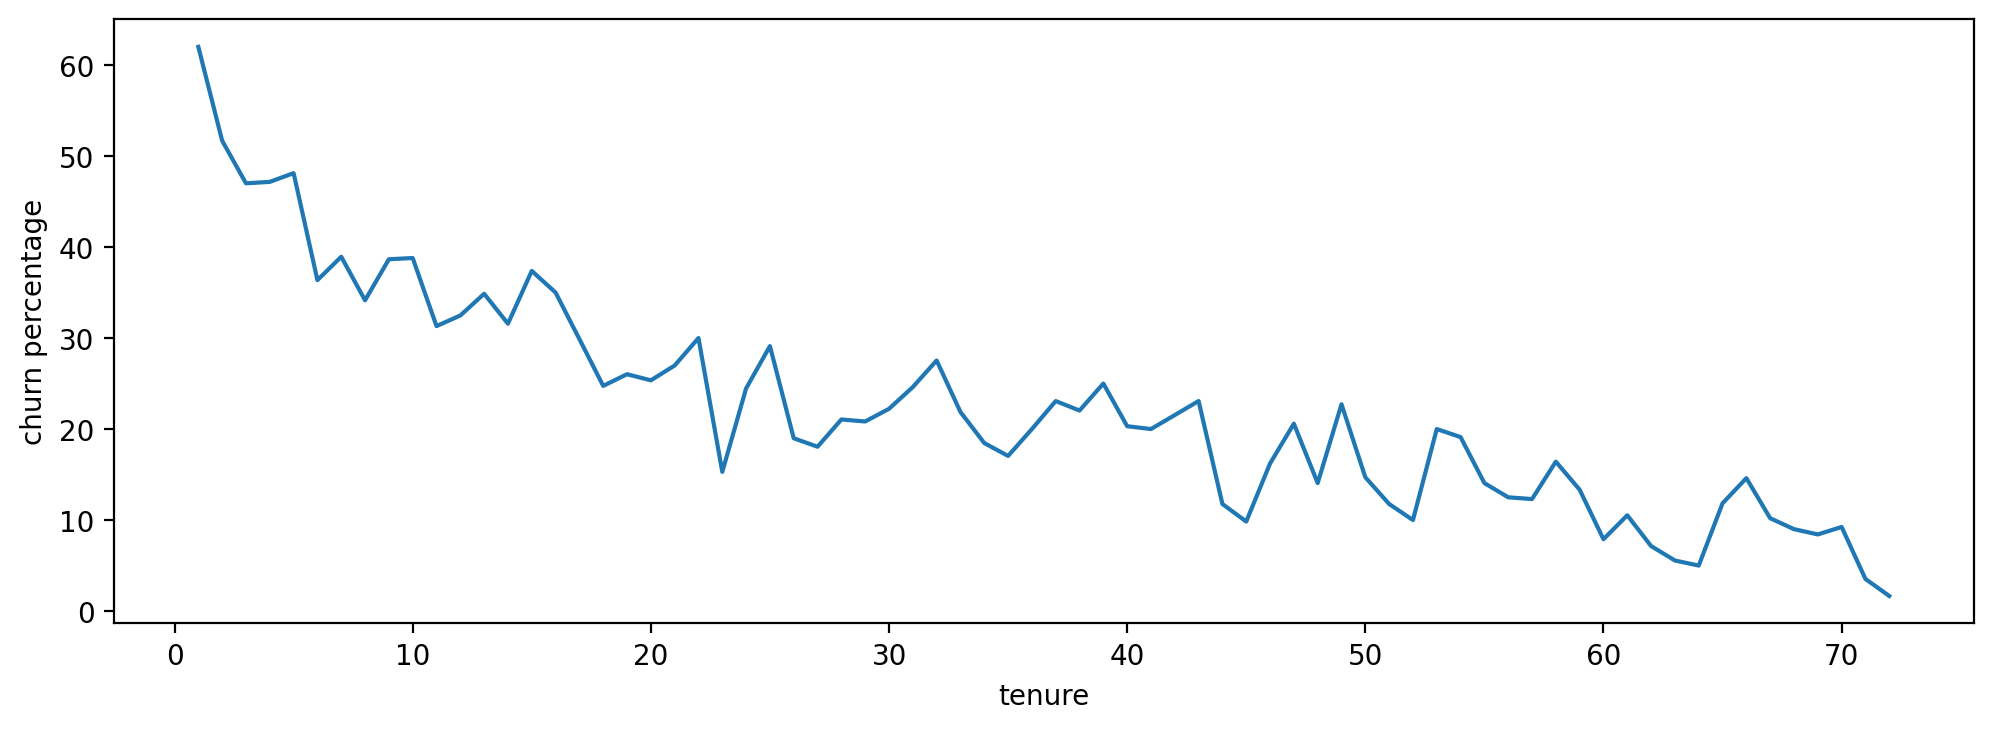

In [29]:
plt.figure(figsize=(12,4), dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('churn percentage')

In [30]:
def cohort(tenure):
    if tenure < 13:
        return '0 to 12 months'
    elif tenure < 24:
        return '12 to 24 months'
    elif tenure < 48:
        return '24 to 48 months'
    else:
        return 'over 48 months'

In [31]:
df['tenure_cohort'] = df['tenure'].apply(cohort)

In [32]:
df[['tenure','tenure_cohort']].sort_values(by=['tenure'],ascending=False)

,tenure,tenure_cohort
2983,72,over 48 months
3817,72,over 48 months
3879,72,over 48 months
6650,72,over 48 months
6652,72,over 48 months
...,...,...
3845,1,0 to 12 months
474,1,0 to 12 months
1366,1,0 to 12 months
1368,1,0 to 12 months


In [33]:
df.head(10)[['tenure','tenure_cohort']]

,tenure,tenure_cohort
0,1,0 to 12 months
1,34,24 to 48 months
2,2,0 to 12 months
3,45,24 to 48 months
4,2,0 to 12 months
5,8,0 to 12 months
6,22,12 to 24 months
7,10,0 to 12 months
8,28,24 to 48 months
9,62,over 48 months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

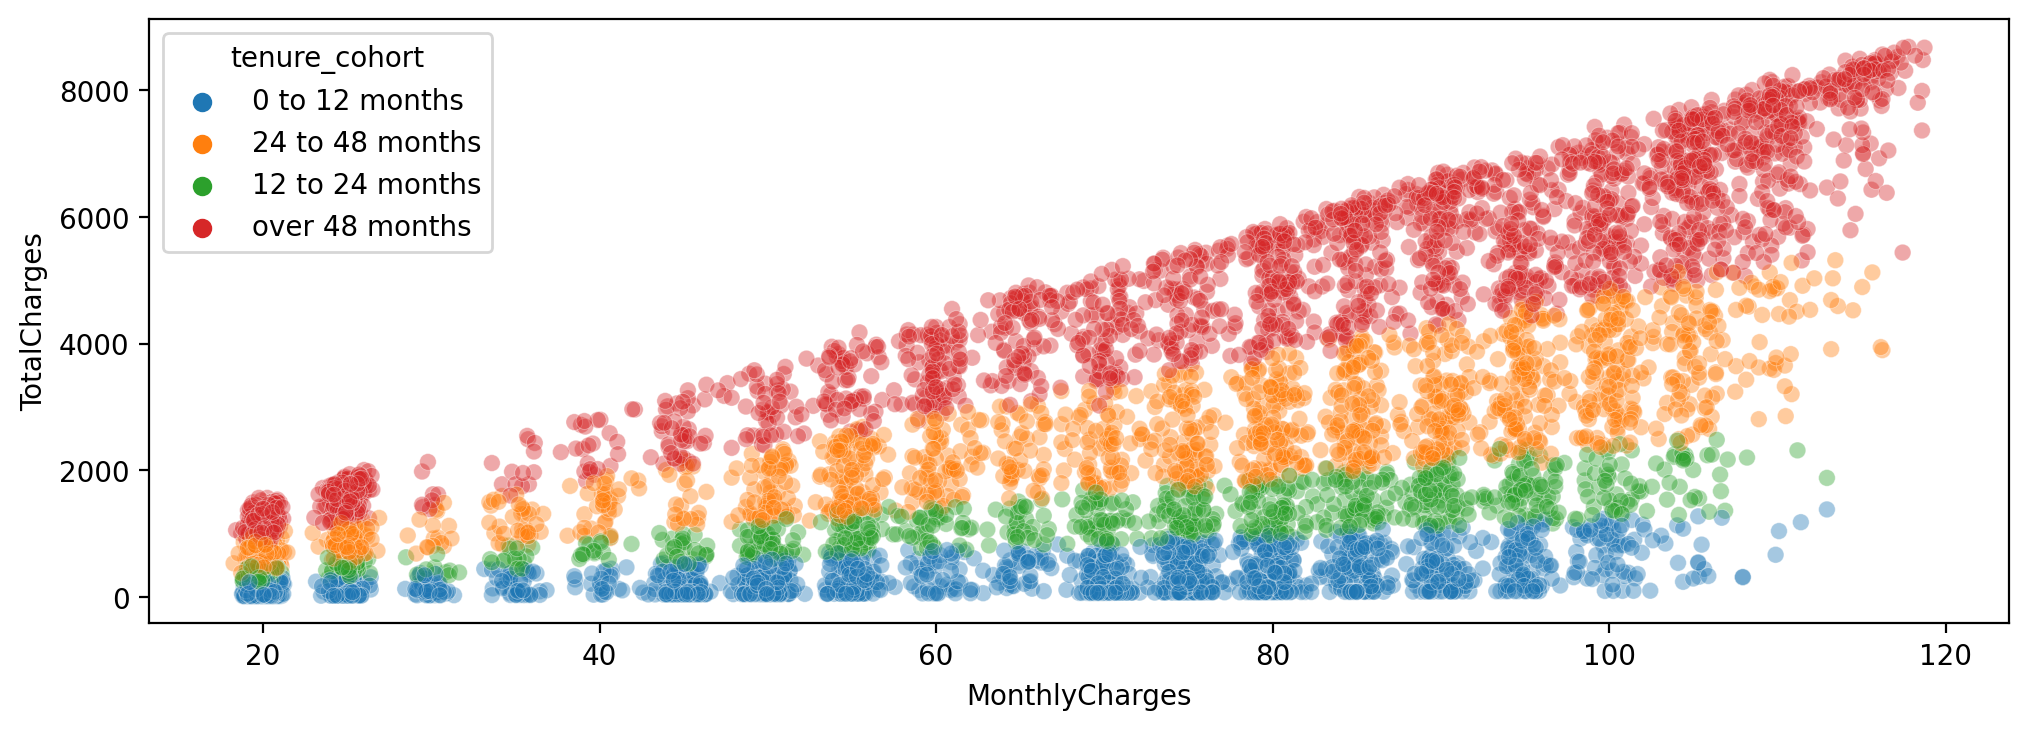

In [37]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='tenure_cohort', alpha=0.4, linewidth =0.3)

<AxesSubplot:xlabel='tenure_cohort', ylabel='count'>

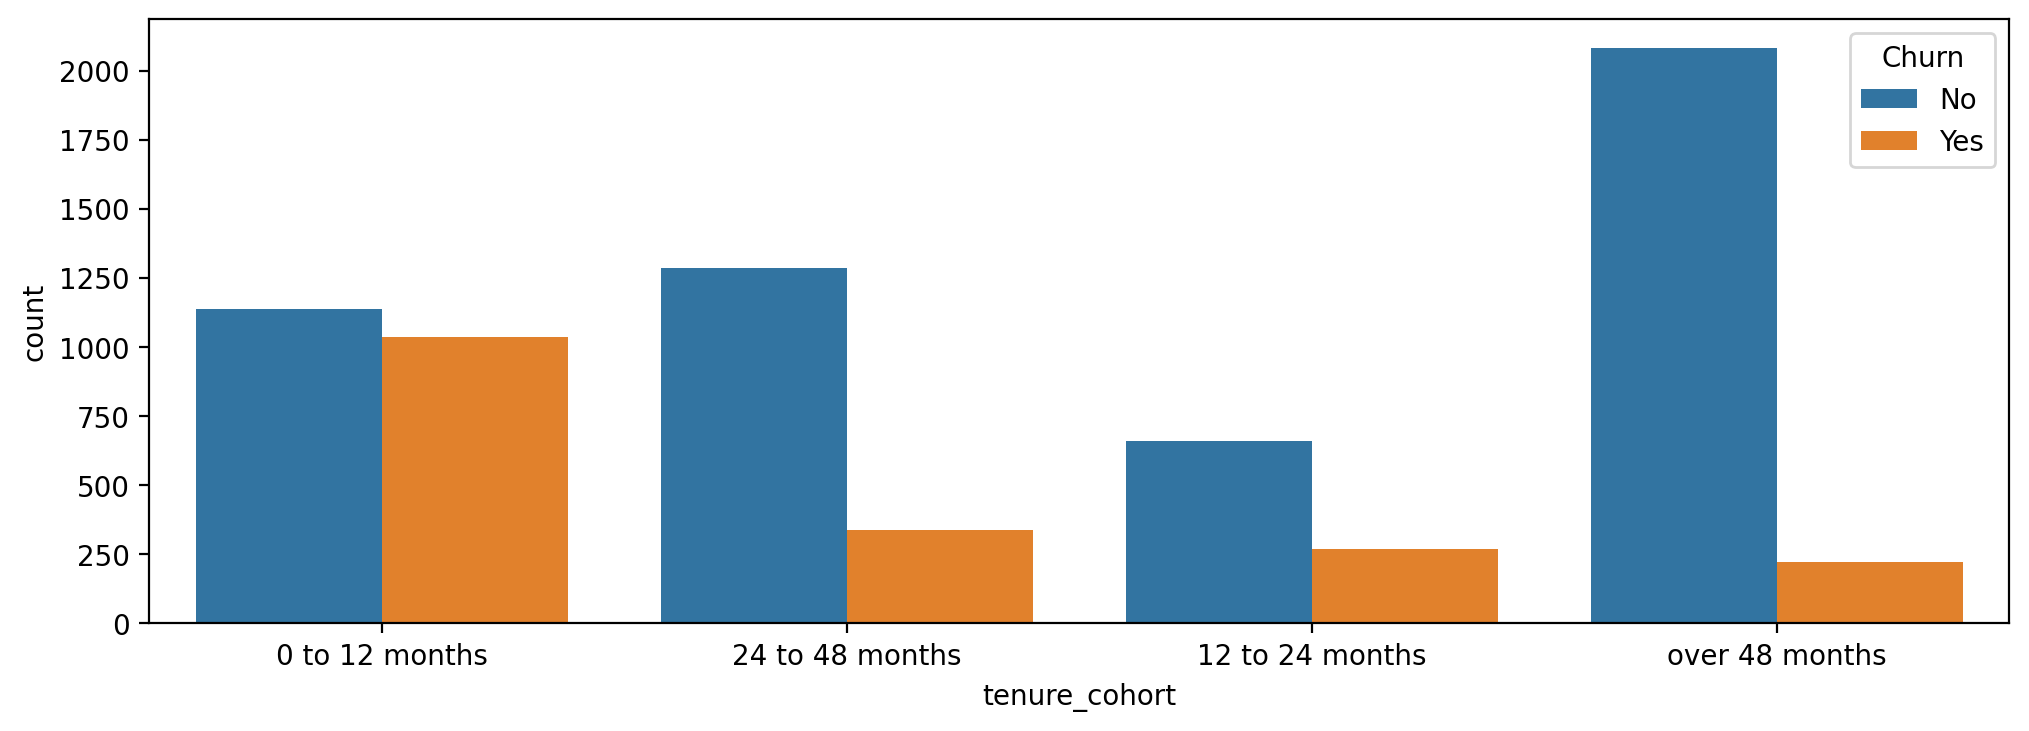

In [38]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='tenure_cohort', hue='Churn', data=df)

<Figure size 2400x800 with 0 Axes>

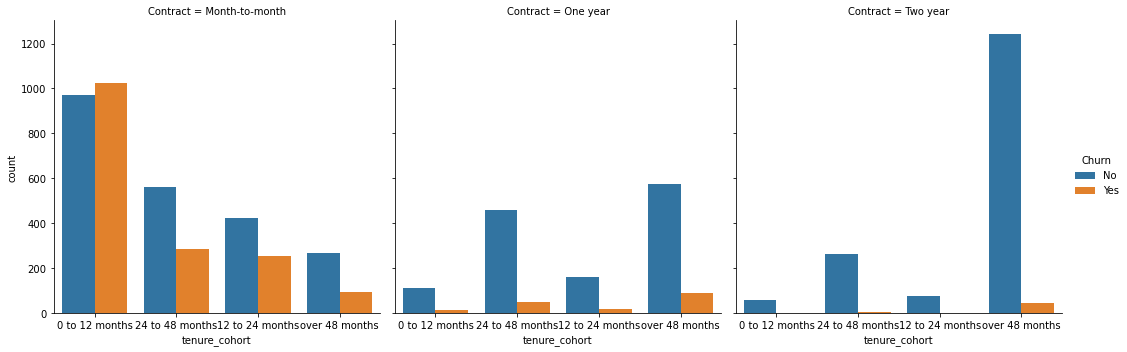

In [54]:
plt.figure(figsize=(12,4), dpi=200)
sns.catplot(x='tenure_cohort', col='Contract', hue='Churn', data=df, kind='count')

In [58]:
df.columns
#df[['tenure_cohort']]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_cohort'],
      dtype='object')

In [61]:
X = df.drop('Churn', axis=1)
X = pd.get_dummies(X,drop_first=True)
X.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031
SeniorCitizen,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,1.0,0.00
tenure,1.00,34.00,2.00,45.00,2.00,8.00,22.0,10.00,28.00,62.00,...,38.00,67.00,19.0,12.00,72.00,24.0,72.0,11.00,4.0,66.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70,99.65,89.1,29.75,104.80,56.15,...,69.50,102.95,78.7,60.65,21.15,84.8,103.2,29.60,74.4,105.65
TotalCharges,29.85,1889.50,108.15,1840.75,151.65,820.50,1949.4,301.90,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.30,1419.40,1990.5,7362.9,346.45,306.6,6844.50
gender_Male,0.00,1.00,1.00,1.00,0.00,0.00,1.0,0.00,0.00,1.00,...,1.00,0.00,1.0,0.00,0.00,1.0,0.0,0.00,1.0,1.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,...,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.00,1.0,0.00
Dependents_Yes,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,1.00,...,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.00,0.0,0.00
PhoneService_Yes,0.00,1.00,1.00,0.00,1.00,1.00,1.0,0.00,1.00,1.00,...,1.00,1.00,1.0,0.00,1.00,1.0,1.0,0.00,1.0,1.00
MultipleLines_No phone service,1.00,0.00,0.00,1.00,0.00,0.00,0.0,1.00,0.00,0.00,...,0.00,0.00,0.0,1.00,0.00,0.0,0.0,1.00,0.0,0.00
MultipleLines_Yes,0.00,0.00,0.00,0.00,0.00,1.00,1.0,0.00,1.00,0.00,...,0.00,1.00,0.0,0.00,0.00,1.0,1.0,0.00,1.0,0.00


In [62]:
y=df['Churn']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101)

In [129]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [70]:
model = DecisionTreeClassifier(max_depth=6)

In [71]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [72]:
pred = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [74]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       572
         Yes       0.49      0.55      0.52       132

    accuracy                           0.81       704
   macro avg       0.69      0.71      0.70       704
weighted avg       0.82      0.81      0.81       704



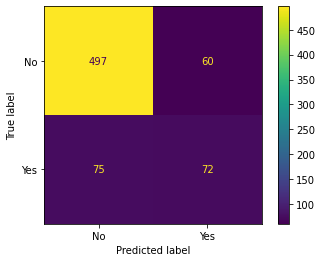

In [77]:
print(classification_report(pred, y_test))
plot_confusion_matrix(model, X_test, y_test)

In [87]:
feature_imp = model.feature_importances_

feature_imp

array([0.01082504, 0.42391407, 0.04229274, 0.06799038, 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.02628952, 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [109]:
feature_dt = pd.DataFrame(data=feature_imp, index = X.columns, columns = ['feature_imp'])

feature_dt=feature_dt.sort_values('feature_imp')

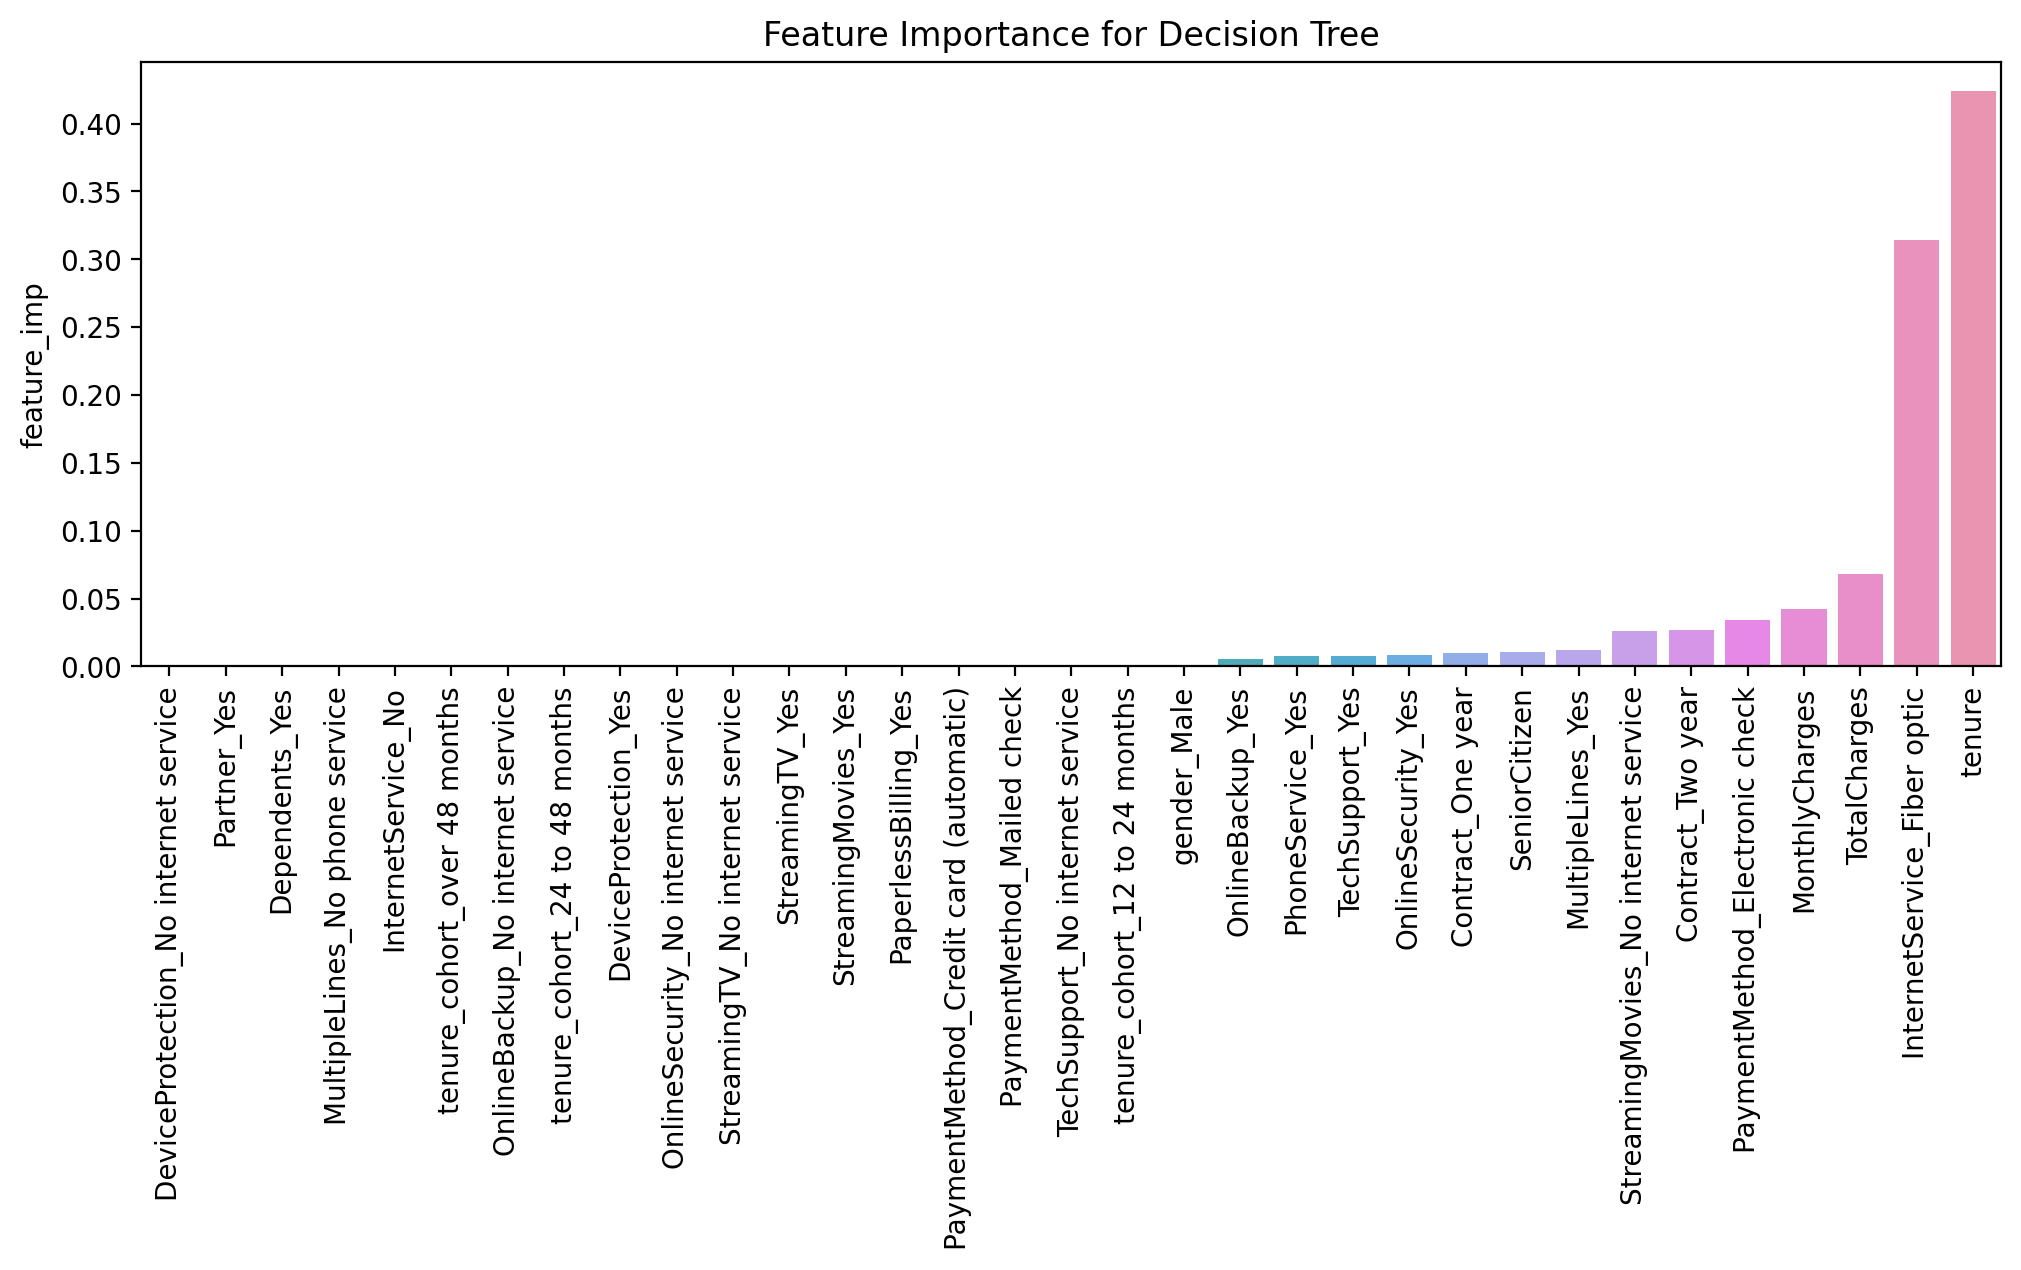

In [128]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(data=feature_dt.sort_values('feature_imp'),x=feature_dt.sort_values('feature_imp').index,y='feature_imp')
plt.xticks(rotation=90);
plt.title("Feature Importance for Decision Tree");

In [126]:
feature_dt['feature_imp'].index

Index(['DeviceProtection_No internet service', 'tenure_cohort_12 to 24 months',
       'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)',
       'PaperlessBilling_Yes', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'DeviceProtection_Yes', 'tenure_cohort_24 to 48 months',
       'OnlineBackup_No internet service', 'tenure_cohort_over 48 months',
       'InternetService_No', 'MultipleLines_No phone service',
       'Dependents_Yes', 'OnlineSecurity_No internet service', 'Partner_Yes',
       'gender_Male', 'OnlineBackup_Yes', 'PhoneService_Yes',
       'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year',
       'SeniorCitizen', 'MultipleLines_Yes',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'tenure'],
      dtype='object')

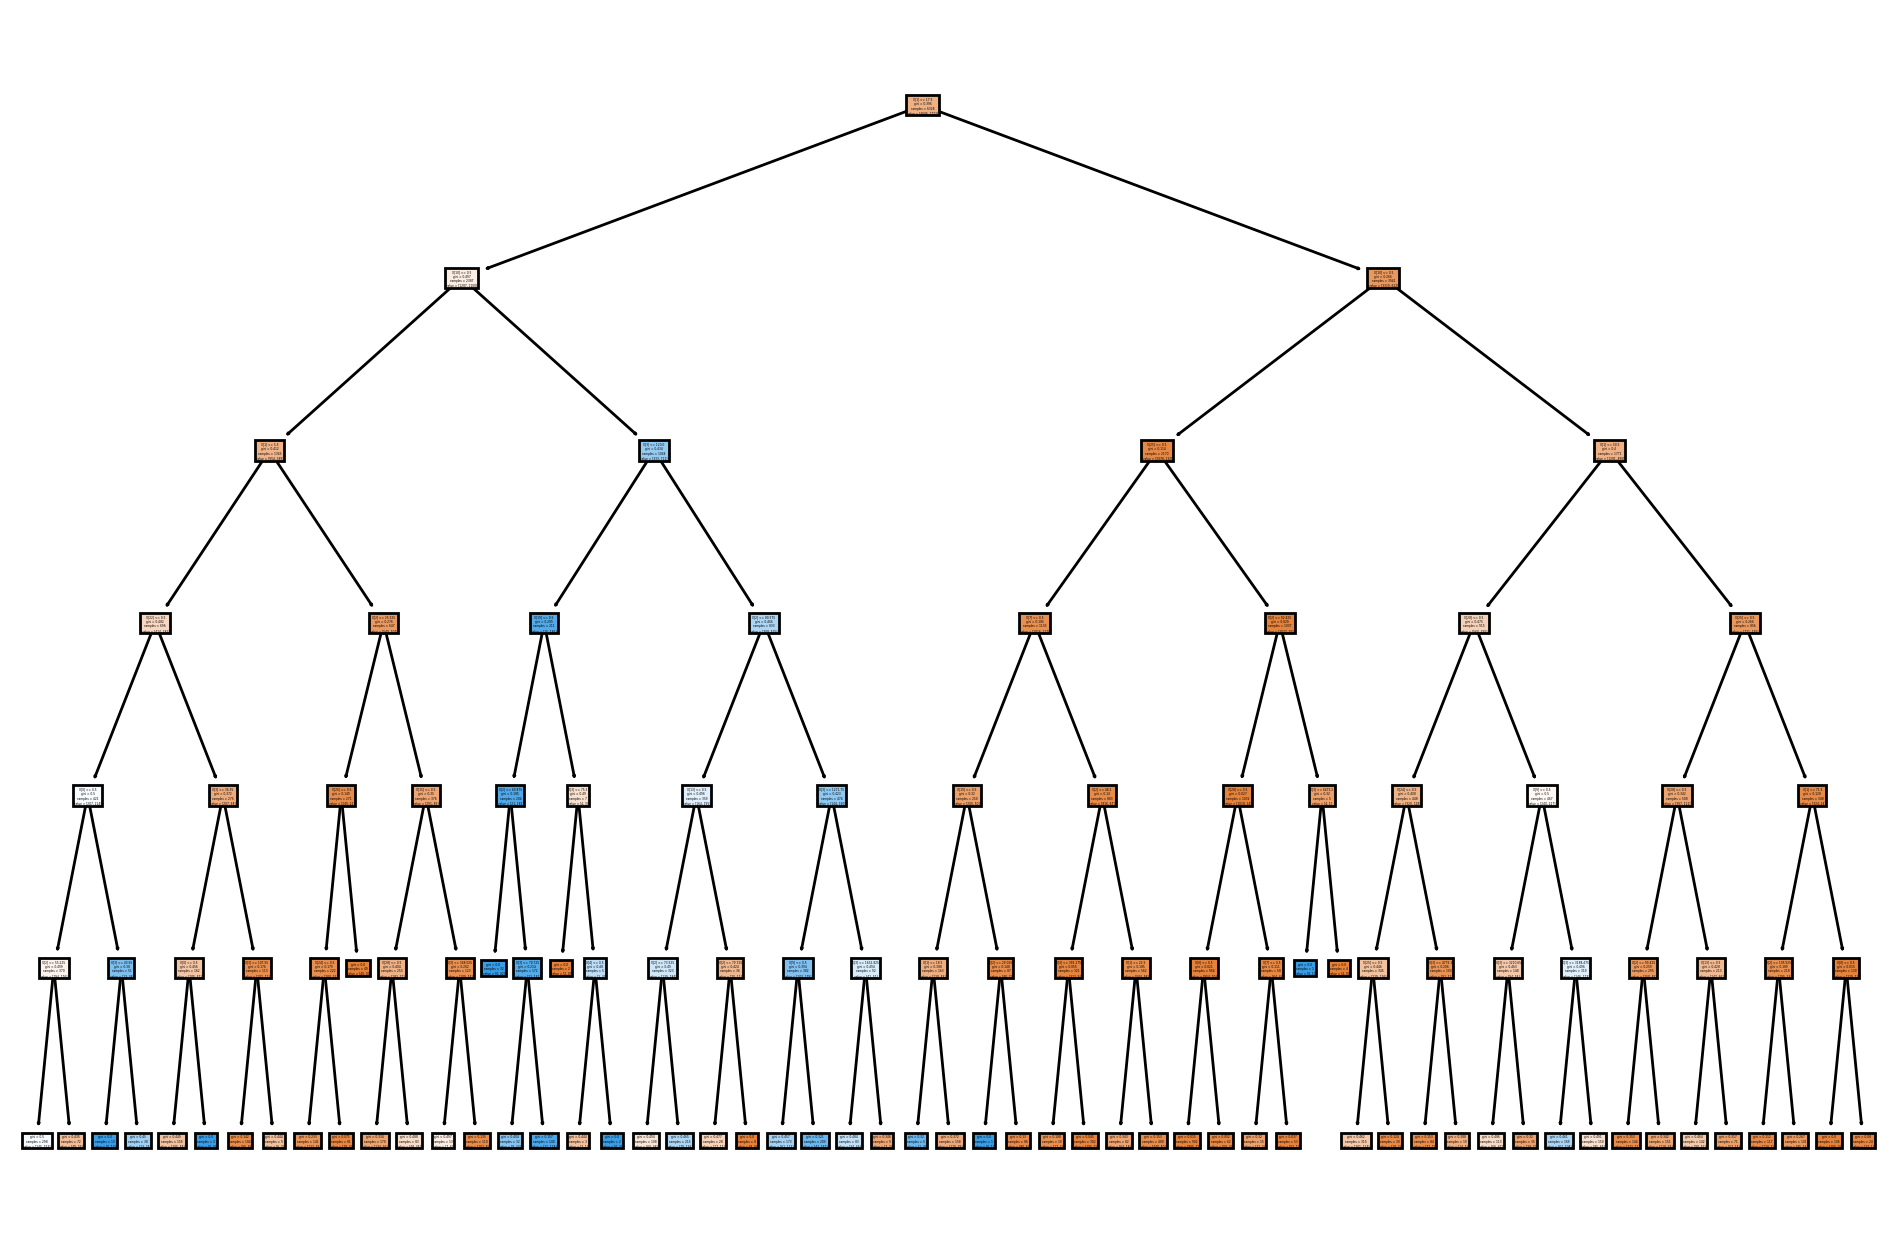

In [134]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, filled=True);

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
reg_model = RandomForestClassifier()

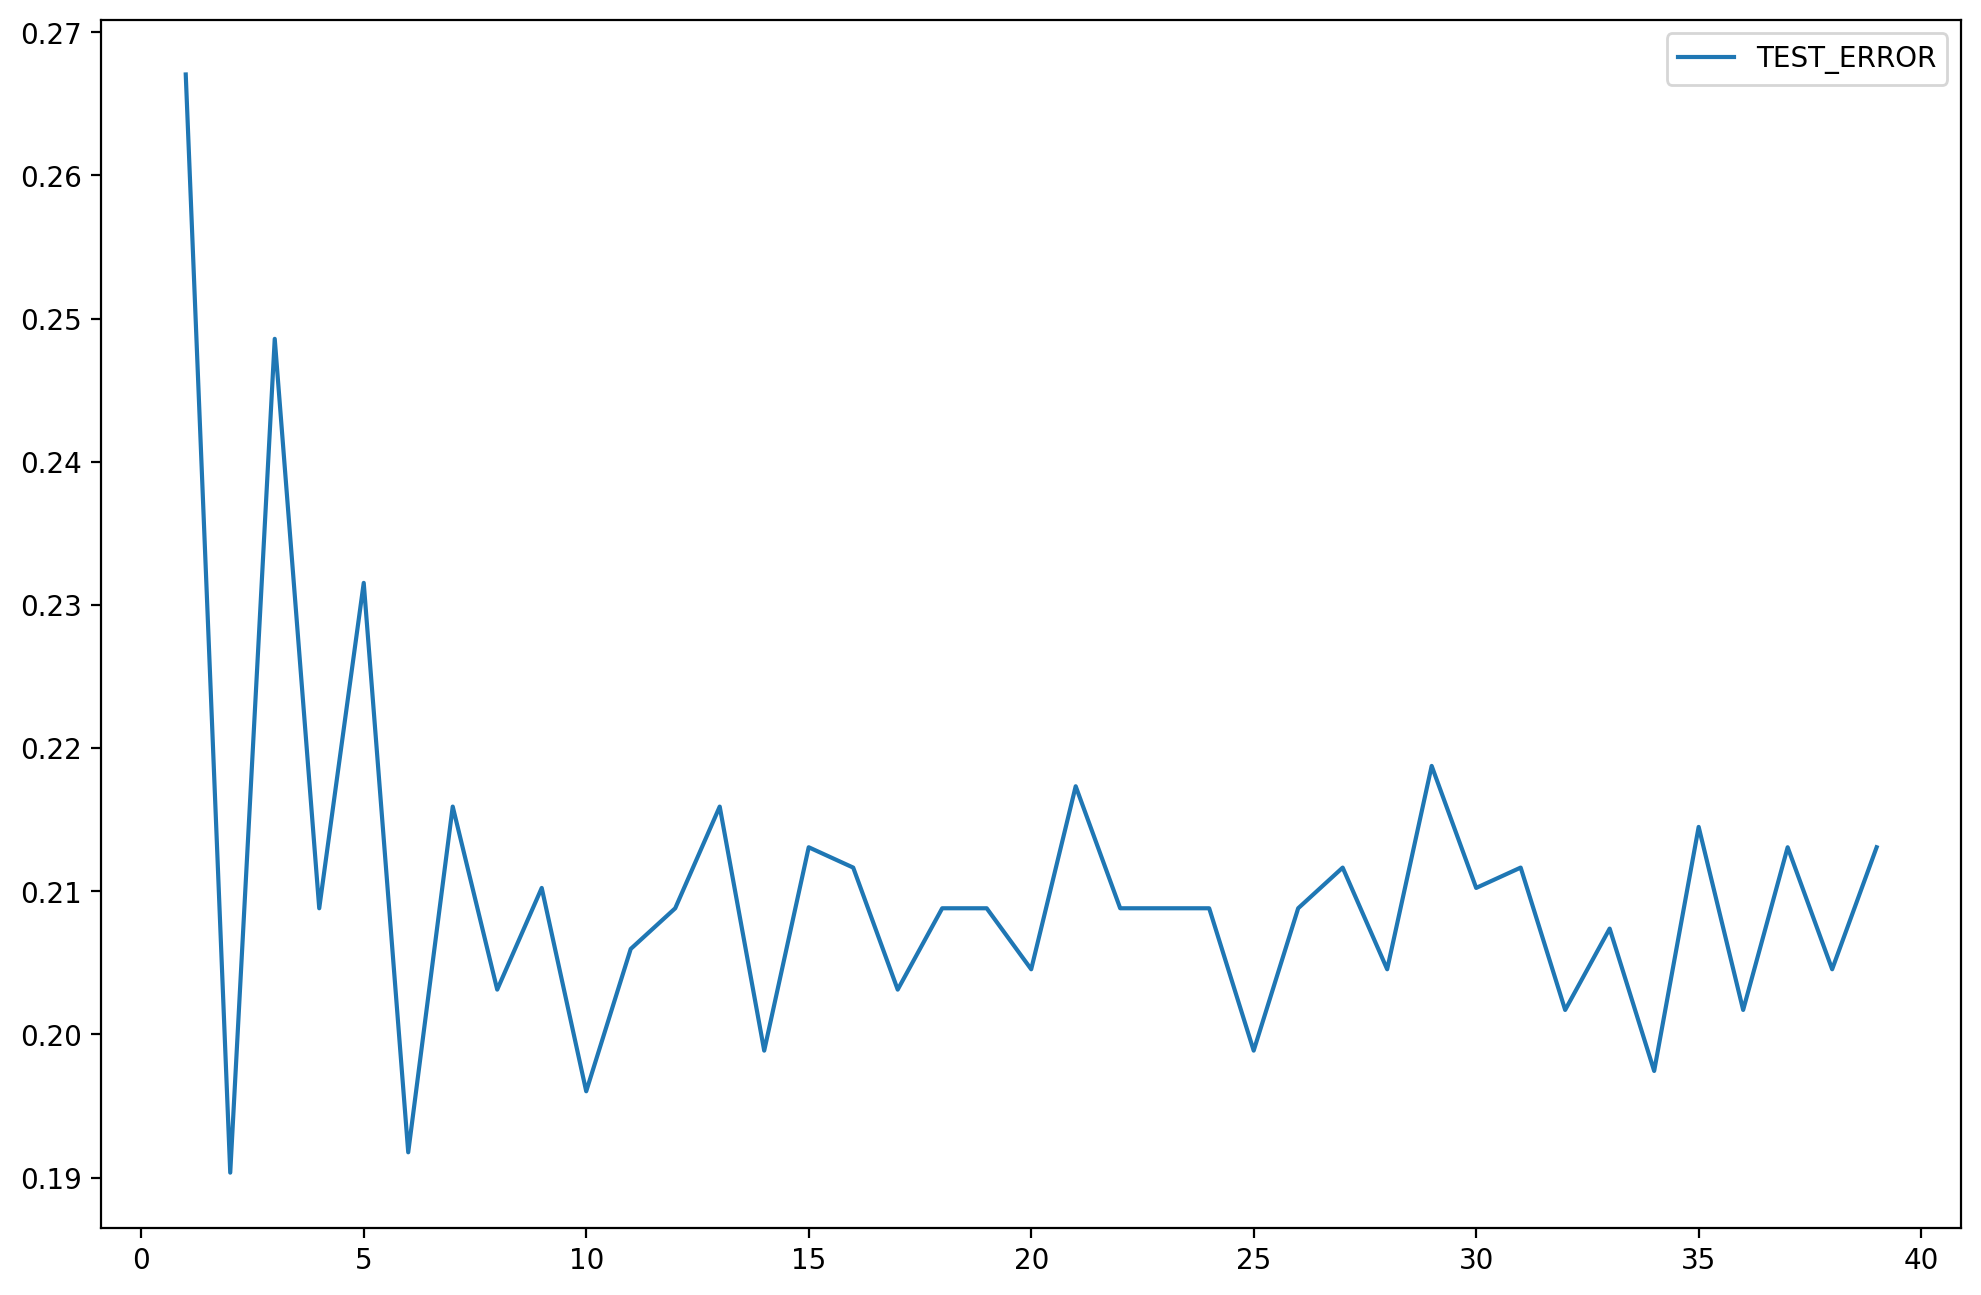

In [138]:
test_error = []
plt.figure(figsize=(12,8), dpi=200)
for n in range(1,40):
    reg_model = RandomForestClassifier(n_estimators=n, max_features='auto', )
    reg_model.fit(X_train, y_train)
    reg_model_pred = reg_model.predict(X_test)
    test_error.append(1-accuracy_score(reg_model_pred, y_test))
    
plt.plot(range(1,40), test_error, label = 'TEST_ERROR')
plt.legend()

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       572
         Yes       0.49      0.55      0.52       132

    accuracy                           0.81       704
   macro avg       0.69      0.71      0.70       704
weighted avg       0.82      0.81      0.81       704



D:\my_stuff\new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


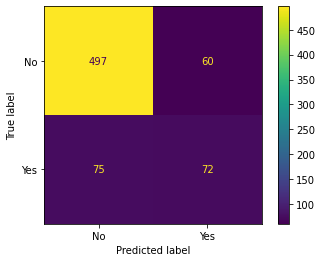

In [139]:
print(classification_report(pred, y_test))
plot_confusion_matrix(model, X_test, y_test)

In [141]:
from sklearn.ensemble import AdaBoostClassifier

              precision    recall  f1-score   support

          No       0.91      0.88      0.89       579
         Yes       0.52      0.61      0.56       125

    accuracy                           0.83       704
   macro avg       0.71      0.74      0.73       704
weighted avg       0.84      0.83      0.83       704



D:\my_stuff\new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


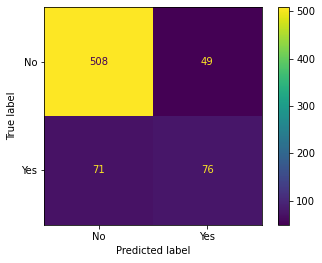

In [142]:
errors = []
for n in range(1,40):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    err=1-accuracy_score(y_test, pred)
    errors.append(err)

print(classification_report(pred, y_test))
plot_confusion_matrix(model, X_test, y_test)

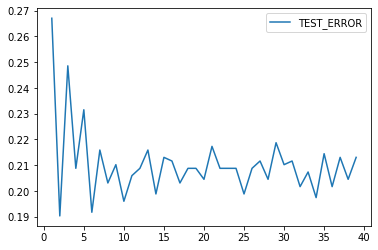

In [143]:
plt.plot(range(1,40), test_error, label = 'TEST_ERROR')
plt.legend()